<a href="https://colab.research.google.com/github/markasif/ANN_Deep_Learning-Examples-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# a time series generator is a tool used to create sequence of data points
# that represent a time series. these generated sequences can be valuable for
# various purposes in machine learning, particularly when dealing with tasks
# involving forecasting or analysis or analysis of sequential data.


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/extra/alcohol_sale.csv',index_col='DATE',parse_dates=True)

In [ ]:
data

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-12-01,15504
2019-01-01,10768
2019-02-01,11134


<Axes: xlabel='DATE'>

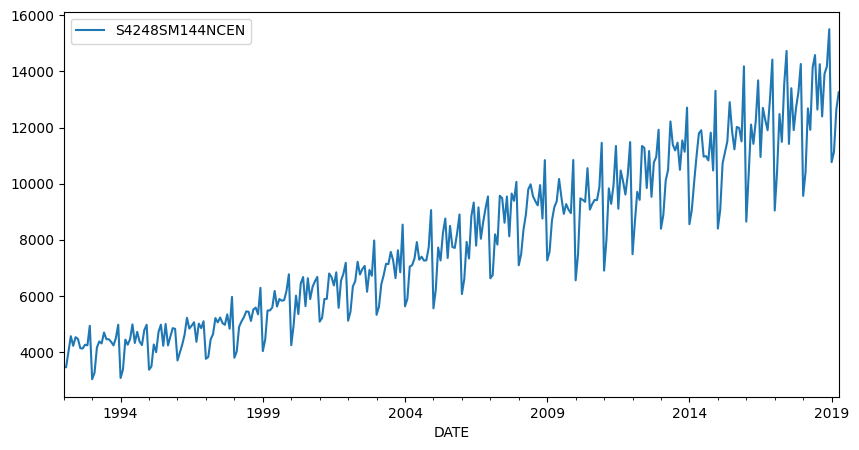

In [ ]:
data.plot(figsize=(10,5))

In [ ]:
scaler=MinMaxScaler()

In [ ]:
train_data=data[:316] #contains the first 316 rows of your original dataset
test_data=data[316:]

In [ ]:
scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [ ]:
n_input=12 #using a sequence length of 12 time steps for your input data
n_features=1 # this variable is set to 1, indicating that each time step has one feature
generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=n_input,batch_size=1)
# which is a mechanism for dynamically providing batches of data during the training process
# Timeseriesgenrator: helps in organizing this type of data into batches suitable for training deep learning models.

In [ ]:
x,y=generator[0] #unpacks the first tuple from the generator and assigns its elements to variable
#this assume that the generator produces tuples with at elast two elements

print(x.flatten(),y) # flattened version of x followed by the value of y

[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443] [[0.]]


In [ ]:
model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1,activation='tanh'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(generator,epochs=30)

Epoch 1/30
 42/304 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0691

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0289
Epoch 2/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0085
Epoch 3/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0059
Epoch 4/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0036
Epoch 5/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048
Epoch 6/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0028
Epoch 7/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023
Epoch 8/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017
Epoch 9/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022
Epoch 10/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014
Epoch 11/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0021
Epoch 12/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0018
Epoch 13/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0021
Epoch 14/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017
Epoch 15/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018


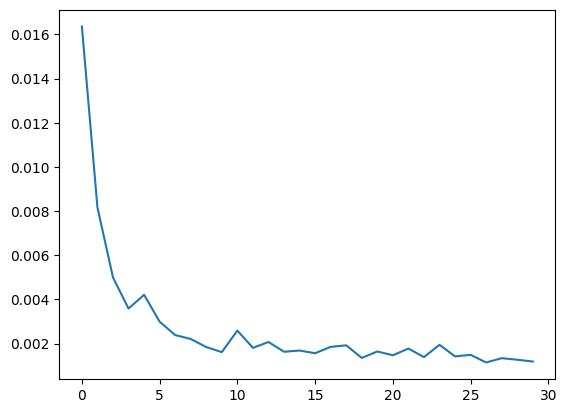

In [ ]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_predictions=[]
first_batch=scaled_train_data[-n_input:] #indicates that you want to start from the end of the sequence and move backwards
current_batch=first_batch.reshape((1,n_input,n_features))
#print(current_batch)
for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

  #extracts all elements from the original current_batch except for the first element along the second axis.
  # This effectively removes all elements from each sequence in the batch.
  # shifting the contents of the current_batch to the left along the second axis(removing the first element from each sequence) and then appear

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
test_predictions

[array([0.84153664], dtype=float32),
 array([0.85072684], dtype=float32),
 array([0.71554893], dtype=float32),
 array([0.8045845], dtype=float32),
 array([0.72024477], dtype=float32),
 array([0.7544347], dtype=float32),
 array([0.77250355], dtype=float32),
 array([0.78587955], dtype=float32),
 array([0.5492167], dtype=float32),
 array([0.62783676], dtype=float32),
 array([0.6855285], dtype=float32),
 array([0.66025484], dtype=float32)]

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[12876.13716447],
       [12983.65333486],
       [11402.20696193],
       [12443.83410263],
       [11457.14350903],
       [11857.13161123],
       [12068.51908785],
       [12225.00488311],
       [ 9456.28602916],
       [10376.06230038],
       [11050.99811769],
       [10755.32132733]])

In [ ]:
test_data_inverse=scaler.inverse_transform(scaled_test_data)
test_data_inverse

array([[14138.],
       [14583.],
       [12640.],
       [14257.],
       [12396.],
       [13914.],
       [14174.],
       [15504.],
       [10768.],
       [11134.],
       [12653.],
       [13258.]])

In [ ]:
pd.DataFrame({'True values':test_data_inverse[:,0],'predicted values':true_predictions[:,0]})

,True values,predicted values
0,14138.0,12876.137164
1,14583.0,12983.653335
2,12640.0,11402.206962
3,14257.0,12443.834103
4,12396.0,11457.143509
5,13914.0,11857.131611
6,14174.0,12068.519088
7,15504.0,12225.004883
8,10768.0,9456.286029
9,11134.0,10376.062300


<Axes: xlabel='DATE'>

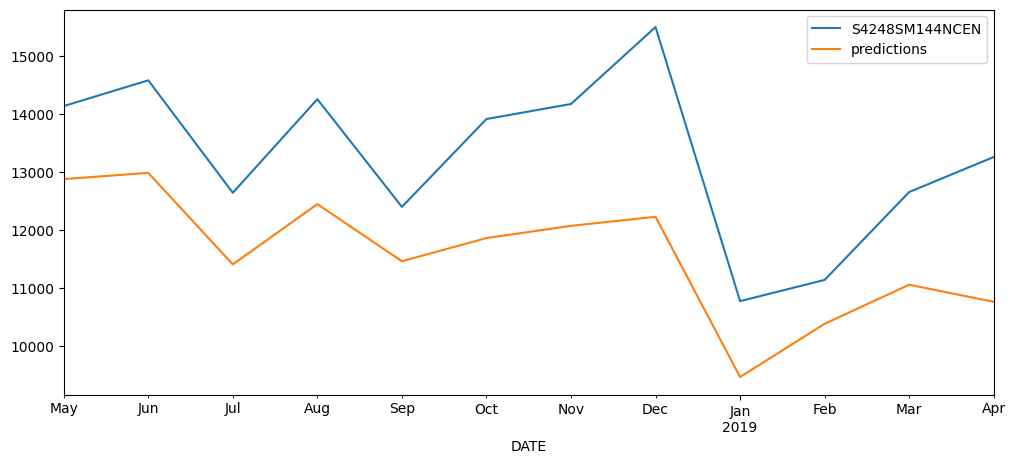

In [ ]:
test_dataNew=test_data.copy()
test_dataNew['predictions']=true_predictions
test_dataNew.plot(figsize=(12,5))

In [ ]:
from keras.layers import LSTM

In [ ]:
model2=Sequential()
model2.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model2.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.compile(loss='mse',optimizer='adam')

In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.fit(generator,epochs=30)

Epoch 1/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0460
Epoch 2/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0084
Epoch 3/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0083
Epoch 4/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0079
Epoch 5/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0054
Epoch 6/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0057
Epoch 7/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0051
Epoch 8/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0032
Epoch 9/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.0035
Epoch 10/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0034
Epoch 11/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0021
Epoch 12/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0017
Epoch 13/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0017
Epoch 14/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0022
Epoch 15/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 5s 

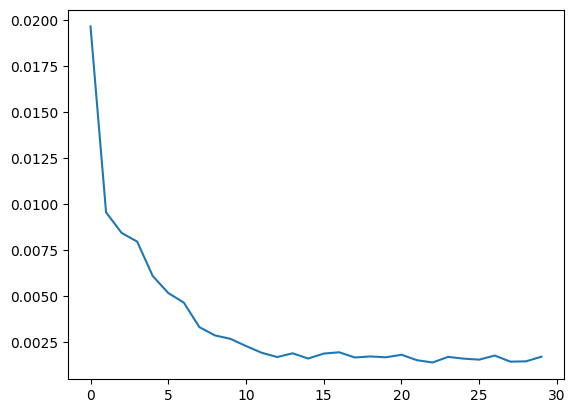

In [ ]:
loss=model2.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_predictions=[] #tostore the predictions
first_batch=scaled_train_data[-n_input:] #indicates that you want to start from the end of the sequence and move backwards
current_batch=first_batch.reshape((1,n_input,n_features))
for i in range(len(test_data)):
  current_pred=model2.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
test_predictions

[array([0.9811269], dtype=float32),
 array([1.0725003], dtype=float32),
 array([0.7932026], dtype=float32),
 array([0.9665249], dtype=float32),
 array([0.82708776], dtype=float32),
 array([0.9052118], dtype=float32),
 array([0.94792485], dtype=float32),
 array([1.0326173], dtype=float32),
 array([0.6266755], dtype=float32),
 array([0.7249775], dtype=float32),
 array([0.9007195], dtype=float32),
 array([0.85343313], dtype=float32)]

In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions

array([[14509.2036556 ],
       [15578.18157232],
       [12310.67697197],
       [14338.37479347],
       [12707.09970391],
       [13621.07292187],
       [14120.77284789],
       [15111.59015012],
       [10362.47651732],
       [11512.51169395],
       [13568.51770461],
       [13015.31421328]])

In [ ]:
test_data_inverse=scaler.inverse_transform(scaled_test_data)
test_data_inverse

array([[14138.],
       [14583.],
       [12640.],
       [14257.],
       [12396.],
       [13914.],
       [14174.],
       [15504.],
       [10768.],
       [11134.],
       [12653.],
       [13258.]])

In [ ]:
pd.DataFrame({'True values':test_data_inverse[:,0],'predicted values':true_predictions[:,0]})

,True values,predicted values
0,14138.0,14509.203656
1,14583.0,15578.181572
2,12640.0,12310.676972
3,14257.0,14338.374793
4,12396.0,12707.099704
5,13914.0,13621.072922
6,14174.0,14120.772848
7,15504.0,15111.590150
8,10768.0,10362.476517
9,11134.0,11512.511694


<Axes: xlabel='DATE'>

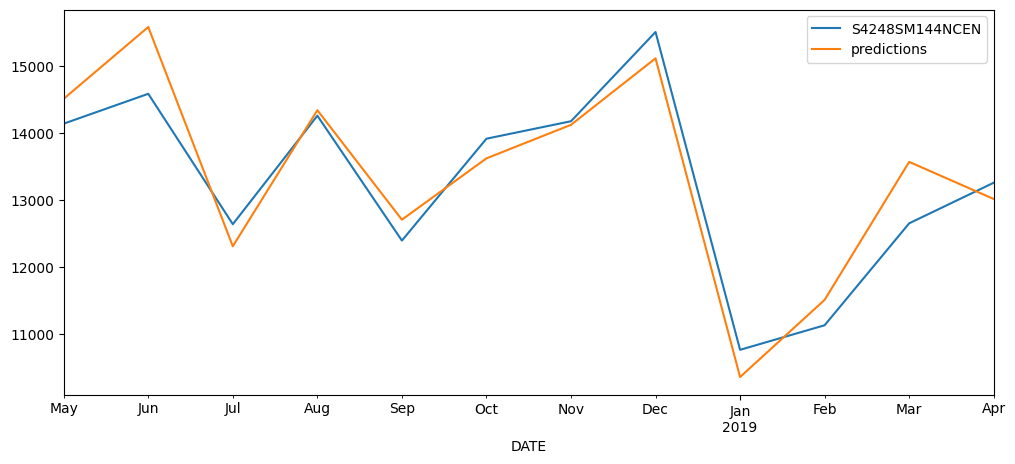

In [ ]:
test_dataNew=test_data.copy()
test_dataNew['predictions']=true_predictions
test_dataNew.plot(figsize=(12,5))